In [59]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [60]:
# For loading from drive when using collab notebook
# os.listdir('/content/drive/My Drive/images_color_se/')

In [61]:
base_dir = 'images_color_se/'
# Putting List of all images in the directory
db_images_path_list = [base_dir + str(images) for images in os.listdir(base_dir) if images.endswith('.jpg')]
print("Number of images in the directory is ", len(db_images_path_list))

Number of images in the directory is  122


In [62]:
# In this section we read all images in RGB and HSV format and store it the list

def read_img(img_path):
    temp_img = cv2.imread(img_path)
    temp_img = cv2.resize(dsize=(64, 64), src=temp_img)
    temp_img_rgb = cv2.cvtColor(temp_img, cv2.COLOR_BGR2RGB)
    temp_img_hsv = cv2.cvtColor(temp_img, cv2.COLOR_BGR2HSV)
    return temp_img_rgb, temp_img_hsv

rgb_images_list = []
hsv_images_list = []
for ele in db_images_path_list:
    rgb_img, hsv_img = read_img(ele)
    rgb_images_list.append(rgb_img)
    hsv_images_list.append(hsv_img)
print("Length of RGB images = ", len(rgb_images_list))

Length of RGB images =  122


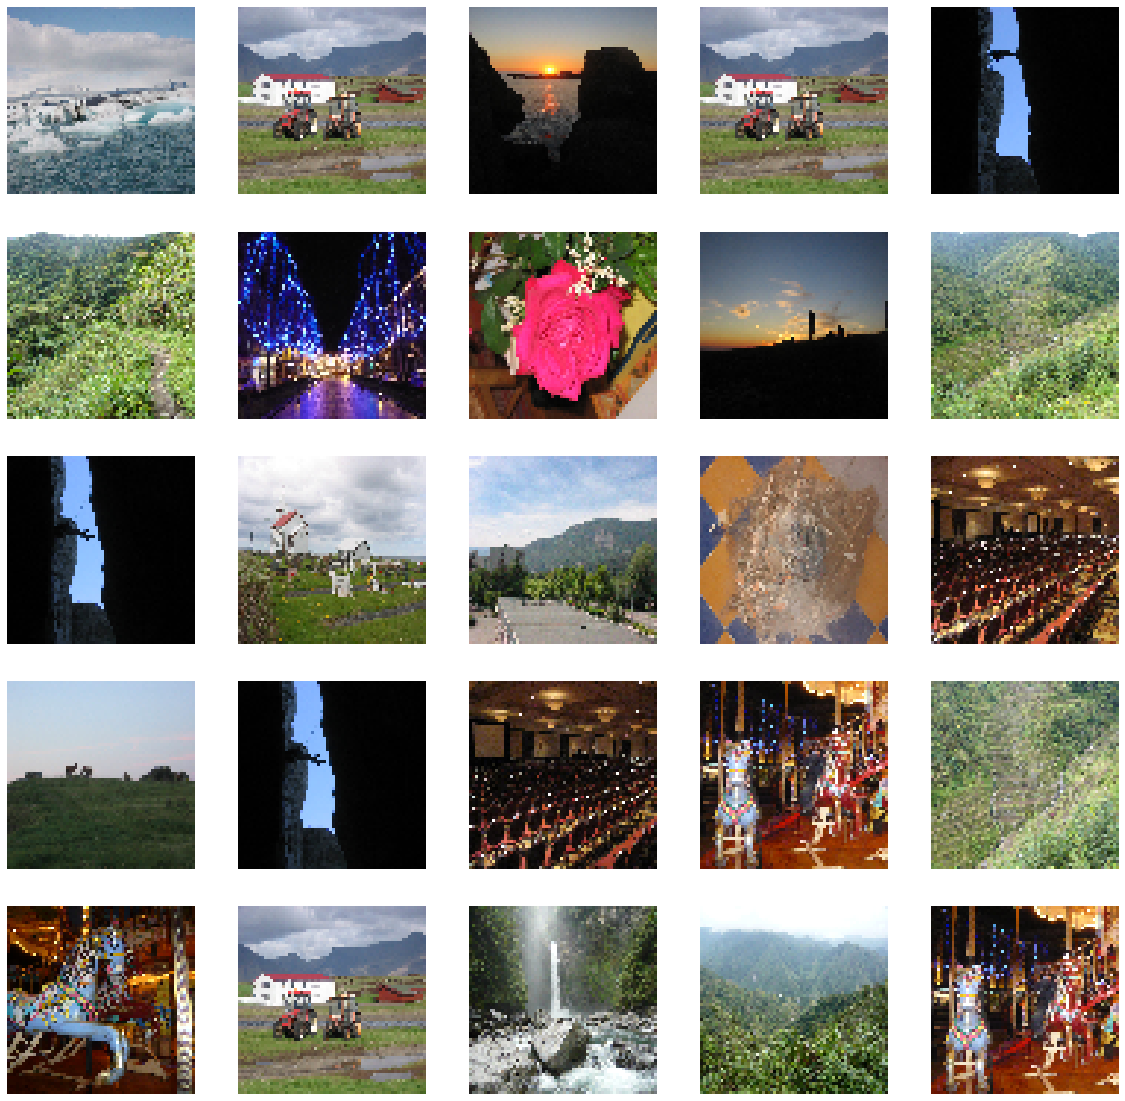

In [63]:
fig = plt.figure(figsize=(20, 20))

row_col = 5

for i in range(row_col):
    for j in range(row_col):
        index = (i * row_col) +  j
        plt.subplot(row_col, row_col, index + 1)
        random_index = np.random.randint(0, len(rgb_images_list))
        plt.imshow(rgb_images_list[random_index])
        plt.axis("off")

In [64]:

def cal_histogram(img):
    # Loads and calculates the normalized histogram of the image
    histr = cv2.calcHist(img, [0], None, [256], [0,256])
    cv2.normalize(histr, histr)
    return histr

def compute_matching_score(img, method):
  # Compares histogram of one image with histogram of all other images
     
    scores = []

    if method == 'rgb':
        image_list = rgb_images_list
        query_img_hist_r = cal_histogram(img[:, :, 0])
        query_img_hist_g = cal_histogram(img[:, :, 1])
        query_img_hist_b = cal_histogram(img[:, :, 2])
    elif method == 'hsv':
        image_list = hsv_images_list
        query_img_hist_hue = cal_histogram(img[:, :, 0])

    for i, temp_img in enumerate(image_list):
        if not (temp_img == img).all():
            if method == 'rgb':
                temp_db_img_hist_r = cal_histogram(temp_img[:, :, 0])
                score_r = cv2.compareHist(query_img_hist_r, temp_db_img_hist_r, cv2.HISTCMP_INTERSECT)
                temp_db_img_hist_b = cal_histogram(temp_img[:, :, 2])
                score_b = cv2.compareHist(query_img_hist_b, temp_db_img_hist_b, cv2.HISTCMP_INTERSECT)
                temp_db_img_hist_g = cal_histogram(temp_img[:, :, 1])
                score_g = cv2.compareHist(query_img_hist_g, temp_db_img_hist_g, cv2.HISTCMP_INTERSECT)
                score = (score_r + score_b + score_g) / 3
                scores.append((rgb_images_list[i], score))
#                 scores.append((rgb_images_list[i], score_r))
            else:
                temp_db_img_hist_hue = cal_histogram(temp_img[:, :, 2])
                score_hue = cv2.compareHist(query_img_hist_hue, temp_db_img_hist_hue, cv2.HISTCMP_INTERSECT)
                scores.append((rgb_images_list[i], score_hue))
#         else:
#             print("It is equal")

    return scores

<class 'numpy.ndarray'>


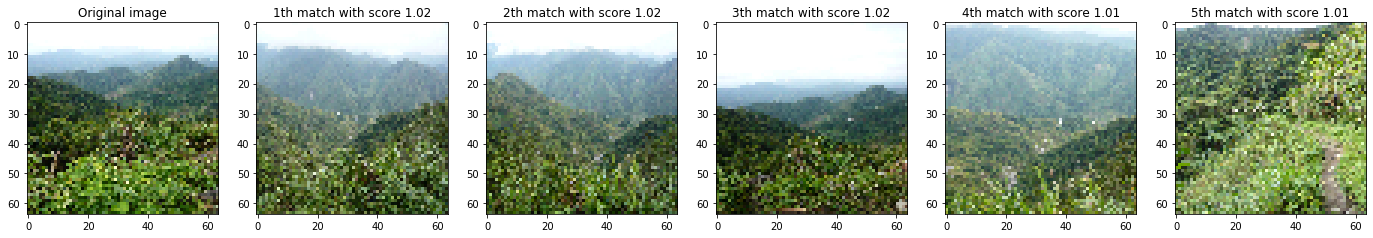

In [76]:
print(type(rgb_images_list[0]))
num_image = np.random.randint(low=0, high=len(rgb_images_list))
query_image = rgb_images_list[num_image] # 61

match_scores = compute_matching_score(query_image, 'rgb')
match_scores.sort(reverse=True, key=lambda x : x[1])

plt.figure(figsize=(24, 10))
plt.subplot(1,6,1)
plt.imshow(query_image)
plt.title('Original image')

for i, match in enumerate(match_scores[:5]):
    rgb_img, score = match
    plt.subplot(1,6,i+2)
    plt.imshow(rgb_img)
    plt.title('%dth match with score %.2f'%(i+1,score))

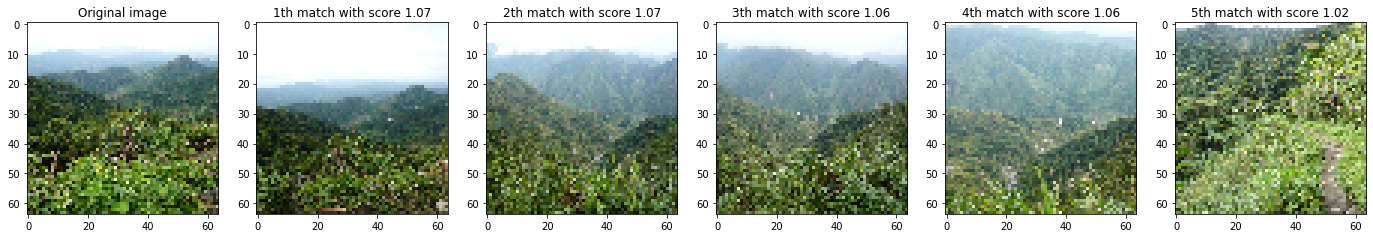

In [77]:
query_image = hsv_images_list[num_image]    # 61

match_scores = compute_matching_score(query_image, 'hsv')
match_scores.sort(reverse=True, key=lambda x : x[1])

plt.figure(figsize=(24, 10))
plt.subplot(1,6,1)
plt.imshow(rgb_images_list[num_image]) # Converting BGR to RGB before displaying the images
plt.title('Original image')

for i, match in enumerate(match_scores[:5]):
    rgb_img, score = match
    plt.subplot(1,6,i+2)
    plt.imshow(rgb_img)
    plt.title('%dth match with score %.2f'%(i+1,score))

In [16]:
print(num_image)

61
